In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

np.random.seed(42)

dates = pd.date_range(start="2018-01-01", periods=300, freq="D")


trend = np.linspace(50, 120, 300)                   
seasonality = 10 * np.sin(2 * np.pi * np.arange(300) / 30) 
noise = np.random.normal(0, 5, 300)                  

sales = trend + seasonality + noise

df = pd.DataFrame({
    "date": dates,
    "sales": sales.round(2)
})

df.to_csv("time_series_sales_300.csv", index=False)

print(df.head())


        date  sales
0 2018-01-01  52.48
1 2018-01-02  51.62
2 2018-01-03  57.77
3 2018-01-04  64.20
4 2018-01-05  57.20


In [120]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

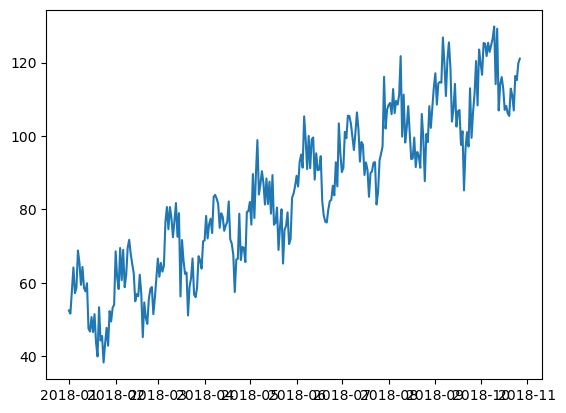

In [121]:
plt.plot(df.index,df['sales'])

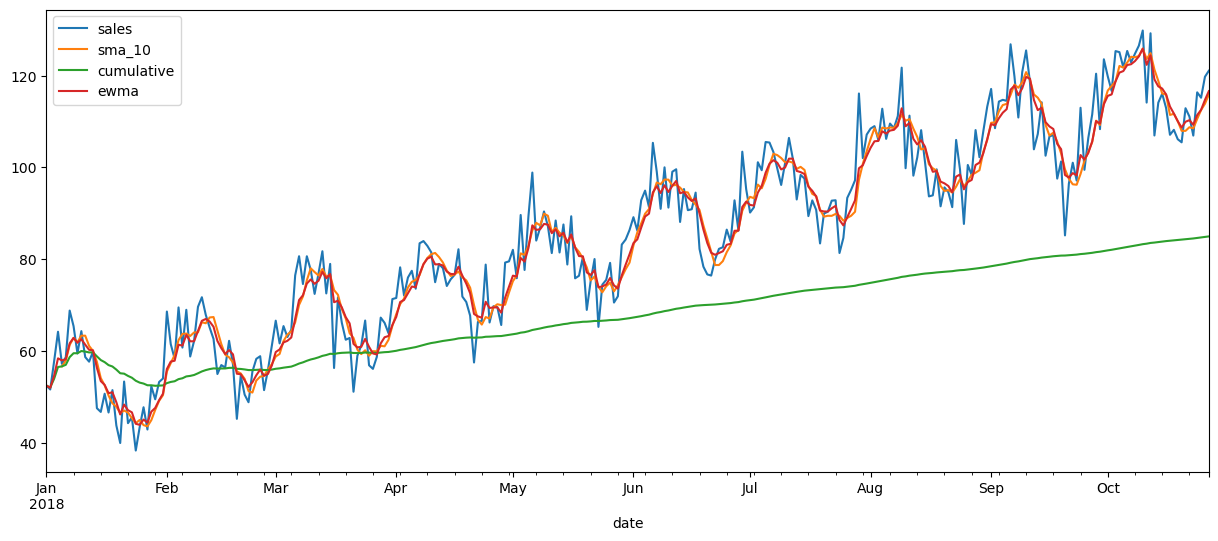

In [122]:
df['sma_10'] = df['sales'].rolling(5).mean()
df['cumulative']=df['sales'].expanding().mean()
df['ewma']=df['sales'].ewm(alpha=0.3).mean()
df.plot(y=['sales', 'sma_10', 'cumulative', 'ewma'], figsize=(15, 6))
plt.show()

In [123]:
#step----------------1


def makeing_stationary(s):
    p_value = adfuller(s)
    if p_value[1]<0.05:
        print("stationary data ")
    else:
        print("no stationary do difference")

In [124]:
df["sales_diff_1"] = df['sales'].diff()
df.dropna(inplace=True)
makeing_stationary(df['sales_diff_1'])

stationary data 


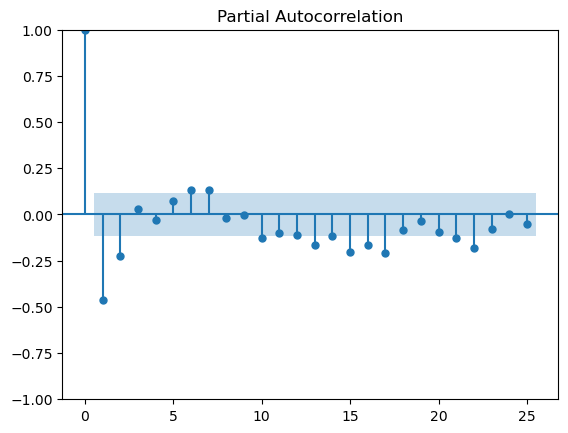

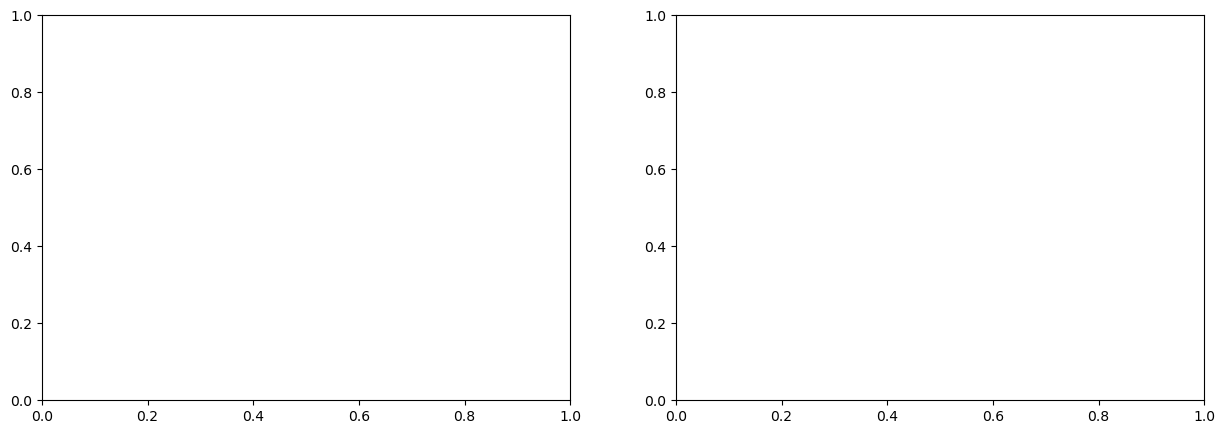

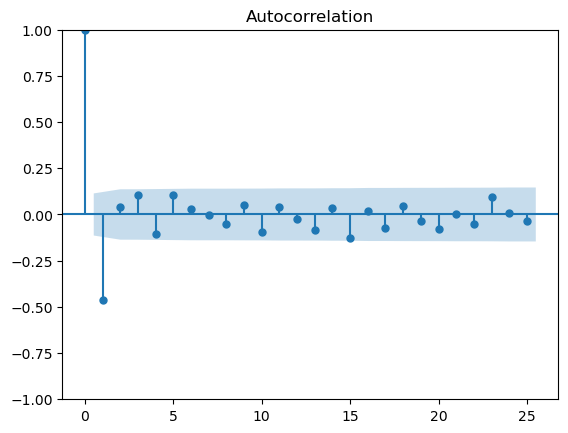

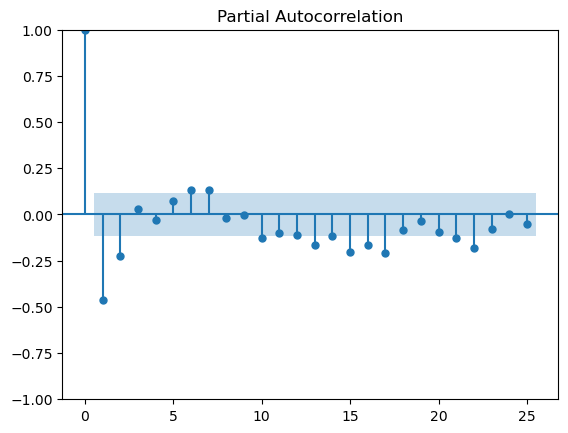

In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df['sales_diff_1'])
plot_pacf(df['sales_diff_1'])

In [126]:
# p=3,q=2,d=1


from statsmodels.tsa.arima.model import ARIMA

train = df[:'2018-07-24']
test = df['2018-07-25':]

In [127]:
model = ARIMA(train['sales'],order=(3,1,2))
pred = model.fit()

/Users/premsai/miniconda3/envs/stock/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/premsai/miniconda3/envs/stock/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/premsai/miniconda3/envs/stock/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/premsai/miniconda3/envs/stock/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/premsai/miniconda3/envs/stock/lib/p

In [ ]:
forecast = pred.forecast(steps=len(test))


In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(test['sales'],forecast)
mse = np.sqrt(mean_squared_error(test['sales'],forecast))
print(mse)
print(mae)

22.64363148152247
20.390963453709546


In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(test['sales'], forecast)
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mape = np.mean(np.abs((test['sales'] - forecast) / test['sales'])) * 100
r2 = r2_score(test['sales'], forecast)

# Display
print("="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"MAE  (Mean Absolute Error):       {mae:.2f}")
print(f"RMSE (Root Mean Squared Error):   {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):     {mape:.2f}%")
print(f"R² Score:                          {r2:.4f}")
print("="*50)

# Interpretation
if mape < 10:
    print(" Excellent forecast accuracy!")
elif mape < 20:
    print("✓ Good forecast accuracy")
elif mape < 30:
    print("⚠ Moderate forecast accuracy")
else:
    print("Poor forecast accuracy - consider model improvements")

MODEL PERFORMANCE METRICS
MAE  (Mean Absolute Error):       20.39
RMSE (Root Mean Squared Error):   22.64
MAPE (Mean Absolute % Error):     18.02%
R² Score:                          -3.7864
✓ Good forecast accuracy
